<h1><center>Laboratorio 5: El Pandas no muerde (act. II) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza
- Auxiliar: Sebastián Tinoco.
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Gabriela Mora
- Nombre de alumno 2: Raúl Silva

### Repo
[Repo git del grupo](https://github.com/RaulSilvaA/MDS7202-mora-silva)

# Temas a tratar

- Manejo de datos tabulares usando `pandas`. En esta segunda parte se incluye adicionalmente agregaciones, concatenaciones, merge y trabajo con strings.
- Visualizaciones interactivas de los datos con `plotly`.

### Reglas:

- **Grupos de máximo 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Aplicar y aprovechar las ventajas que nos ofrece la libreria `pandas`.
- Utilizar `plotly` para obtener información gráfica del dataset.
- Aplicar el **Análisis Exploratorio de Datos** a un caso en particular.


> **Nota**: El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# Importamos librerias utiles 😸

In [ ]:
# Libreria Core del lab.
import numpy as np
import pandas as pd 

from IPython.display import display

#Libreria para visualizar
#!pip install --upgrade plotly
import plotly.figure_factory as ff
import plotly.express as px

# 1. Rendimiento en Estudiantes 📚


<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1hZZaPQlZe4VupFOXt76_wjuUA5NpUhrw" width="300" height="300">
</p>

Para este laboratorio deberán continuar el Análisis Exploratorio de datos sobre el conjunto ```students_grades```, el cual contiene una caracterización sobre el rendimiento y otros atributos de cada alumno de la *Universidad de la Cachaña* .

In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/My Drive/LabsMDS/Lab5/'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##  Carga de Datos [0.5 Puntos]

Ya finalizado en análisis inicial, ud. y su equipo le entregaron a *Don Caguayo* (rector de la Universidad de la Cachaña) tanto los resultados del análisis como también la base de datos limpia y lista para ser almacenada. Dada la ingente cantidad de los datos, el equipo de TI de la universidad resolvió separar el dataset en dos bases de datos distintas (lo que según argumentan ellos, permitiría hacer agregaciones de forma más eficiente). 

Gracias a la excelente labor de ud. y su equipo en el análisis previo, el rector le solicita continuar el trabajo con una nueva batería de análisis. Por este motivo, la sección de TI les entrega nuevamente los datos. Sin embargo, argumentan que dada una escazes de personal, solo le entregarán *dumps* (copias) de cada base de datos y su equipo deberá unir las bases de datos. Los datos se encuentran en los siguiente archivos `.json`: `students_grades_1.json` y `students_grades_2.json`. 


Por ende, ud. y su equipo deciden que la primera tarea se centrará en cargar estos datos y unirlos. 

**No se preocupe por la limpieza ni transformar el tipo de datos de las columnas, ni tampoco transformar a notas chilenas**, recuerde que anteriormente ya se encargo de este tema.

## Cargar bbdd

In [ ]:
#se cargan las 2 bases

students_grade_1=pd.read_json(path+'students_grades_1.json')
students_grade_2=pd.read_json(path+'students_grades_2.json')

In [ ]:
#se unen las 2 bases 
df_grades  = pd.concat([students_grade_1, students_grade_2], axis=0)

Resultado esperado:

In [ ]:
df_grades

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22
...,...,...,...,...,...,...,...,...,...
470,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26
471,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16
472,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86
473,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72


## 1.2- Análisis de Las Notas v2 [2 Punto por Gráficos + 0.5 respuesta]

Preocupado por la dificultad que representa el graficar correctamente las notas, el rector le solicita implementar distintas alternativas de visualización.

Para esto, genere un [boxplot](https://plotly.com/python/box-plots/), un [displot](https://plotly.com/python/distplot/#distplot-with-pandas), un [histograma con un gráfico marginal de caja](https://plotly.com/python/histograms/#visualizing-the-distribution) y un [histograma con el ramo como faceta de fila](https://plotly.com/python/facet-plots/#histogram-facet-grids) que permitan visualizar las notas.

Luego, responda las siguientes pregunta: 

> 1. ¿Existe una diferencia notable entre las notas?

> 2. ¿Cuál de los gráficos mostrados cree que es adecuado para mostrarle al rector? ¿Y a los padres? ¿Y a un centro de estudios educativos? ¿Por qué?. Base sus respuestas en lo visto en la clase de visualizaciones como también en lo que usted y su equipo consideren correcto.

> Hint: Para elaborar el histograma, puede que le sea de utilidad hacer un `melt` del DataFrame, dejando como variables los ramos y valores las notas. Por otra parte, visiten la documentación para generar los gráficos.

**Gráfico de Caja:**

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df_grades["math score"], name='math score'))
fig.add_trace(go.Box(y=df_grades["reading score"], name='reading score'))
fig.add_trace(go.Box(y=df_grades["writing score"], name='writing score'))

fig.show()

**Distplot:**

In [ ]:
# use displot figurefactory
import plotly.figure_factory as ff
import numpy as np

# Group data together
hist_data = [df_grades["math score"], df_grades["reading score"], df_grades["writing score"]]

group_labels = ['Math score', 'Reading score', 'Writing score']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False, bin_size=.2)
fig.show()

**Histograma con Boxplots:**

In [ ]:
grades = pd.melt(df_grades, id_vars=['names'], value_vars=['math score', 'reading score', 'writing score'],
                      var_name ='subject', value_name ='grade', )
grades

,names,subject,grade
0,Rita Courtney,math score,3.22
1,Charles Linstrom,math score,5.80
2,Brian Young,math score,5.38
3,Howard Jimenez,math score,5.86
4,Wayne Wilson,math score,6.64
...,...,...,...
2620,Richard Young,writing score,5.26
2621,Wanda Russell,writing score,3.16
2622,Marina Zeigler,writing score,5.86
2623,Laurie Carter,writing score,4.72


In [ ]:
import plotly.express as px
fig = px.histogram(grades, x="grade", color="subject", marginal="box", # can be `box`, `violin`
                         hover_data=grades.columns, nbins=13, barmode='group')
fig.show()

In [ ]:
math_score = pd.melt(df_grades, id_vars=['names'], value_vars=['math score'],
                      var_name ='subject', value_name ='grade', )
reading_score = pd.melt(df_grades, id_vars=['names'], value_vars=['reading score'],
                      var_name ='subject', value_name ='grade', )
writing_score = pd.melt(df_grades, id_vars=['names'], value_vars=['writing score'],
                      var_name ='subject', value_name ='grade', )

**Histograma con Faceta:**

In [ ]:
from plotly.subplots import make_subplots



In [ ]:
fig2 = make_subplots(rows=3, cols=1, shared_xaxes=True, x_title='grade')

trace1 = go.Histogram(x=math_score['grade'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="math score",
                      hovertemplate =
                      '<br><b>subject</b>: math<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    )

trace2 = go.Histogram(x=reading_score['grade'],
                      xbins=dict(
                        start=0.25,
                        end=7.24,
                        size=0.5),
                      autobinx=False,
                      name="reading score",
                      hovertemplate =
                      '<br><b>subject</b>: reading<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    )

trace3 = go.Histogram(x=writing_score['grade'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="writing score",
                      hovertemplate =
                      '<br><b>subject</b>: writing<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'

                    )


In [ ]:
fig2.append_trace(trace1, 1, 1)
fig2.append_trace(trace2, 2, 1)
fig2.append_trace(trace3, 3, 1)

In [ ]:


# Update xaxis properties
fig2.update_yaxes(title_text="count", row=1, col=1)
fig2.update_yaxes(title_text="count", row=2, col=1)
fig2.update_yaxes(title_text="count", row=3, col=1)


fig2.show()

**Resultados Esperados:**

**Justifique:**

Los gráficos que le mostramos a cada entidad sería:

* **Padres**: El histograma con faceta puede ser relevante, esto debido a que tener la información distribuida  y separada por asignatura es mejor a la hora de buscar una aclaración de un tema en específico.

* **Director**: El histograma con boxplot puede ser la mejor visualización para el director, esto debido a que se trata del punto medio entre informacióhn completa del boxplot a la vez de contener los datos de la frecuencia de las notas de las distintas asignaturas de una manera resumida y compacta. 

* **Centro educativo**: Si bien todas las visualizaciones pueden ser relevantes para un centro especializado, el boxplot contiene información especializada que puede ser relevante para estos, además de que resume de mejor manera los datos y para un entendido del tema será mejor para interpretar o buscar anomalías. De la misma manera, el displot sería útil para entender la distribución de las notas y añadir esta información al estudio. Por último, la información de la frecuencia de las notas podría aportarle en tener el catastro del tamaño de la muestra, en caso de ser necesario.

# 2. Análisis por Nivel Educacional Etnia de los Padres

El rector, basado en su experiencia, cree fuertemente que el nivel educacional y la etnia de los padres influyen en las notas que obtienen sus hijos. 
Como científicos de datos, ud. y su equipo creen que deben encontrar evidencia para confirmar o refutar la hipótesis del rector.

Para esto, deciden generar dos análisis: una tabla de resumen por una parte y gráficos de caja por otro.

### 1.3.4 Tabla de Resumen [1 punto]

Para generar la tabla de resumen:

- [X] Calcular el promedio de las notas y guardarlo en una variable `GPA` (grade point average).
- [X] Hacer una simplificación a través de un mapeo (investigar el método `map()`) de la variable `parental level of education`  según la siguiente conversión: 

        some high school -> school
        some college -> school
        high school -> school
        bachelor's degree -> college
        associate's degree -> college
        master's degree -> postgraduate

  Los resultados de este mapeo deben ser guardados en la columna `simple parental level of education`.


- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener el promedio de las notas. 
- [X] Agregar según 2 niveles: `race/ethnicity` y `simple parental level of education` para obtener un conteo de los alumnos en cada grupo y agregarlos como una nueva fila count.
- [ ] Obtener el porcentaje de alumnos con respecto al total. Los porcentajes deben ser strings que contienen la frecuencia de cada grupo con respecto al total y deben ser terminados en '%'. 


Utilizar la tabla de resultados esperados como guía para desarrollar este punto.

In [ ]:
#Se hace el reemplazo de niveles de educación
df_grades['simple parental level of education']=df_grades['parental level of education'].map({'some high school':'school', 'some college':'school','high school':'school', "bachelor's degree":"college","associate's degree":"college","master's degree":"postgraduate"})

In [ ]:
#Se calculan las medias de las notas y los recuentos por agrupacion
bbdd=pd.DataFrame(df_grades.groupby(['race/ethnicity','simple parental level of education'])\
                              .agg({"math score":'mean',"reading score":'mean',"writing score":'mean',"simple parental level of education":'size'}))

In [ ]:
#se agrega la columna porcentaje del total
bbdd['percentage'] = round((100 * bbdd['simple parental level of education']  / bbdd['simple parental level of education'].sum()),2).astype('string')+'%'

In [ ]:
#se resetean los indices para que quede en el formato que se pide
bbdd=bbdd.reset_index(names=['race/ethnicity', 'simple parental level of education '])

In [ ]:
#Se calcula la variable GPA a partir de las otras notas
GPA=round(bbdd[['math score', 'reading score', 'writing score']].mean(axis=1),2)

In [ ]:
#Se calcula la variable GPA a partir de las otras notas
GPA=round(bbdd[['math score', 'reading score', 'writing score']].mean(axis=1),2)

In [ ]:
#se agrega la variable gpa a la base
bbdd['GPA']=GPA

In [ ]:
#se renombra la variable de recuento
bbdd.rename(columns = {'simple parental level of education':'count'}, inplace = True)

In [ ]:
#se renombra la variable del nivel educacional de los padres
bbdd.rename(columns = {'simple parental level of education\t':'simple parental level of education'}, inplace = True)

In [ ]:
#se reordena la base 
bbdd = bbdd.reindex(columns=['race/ethnicity','simple parental level of education ','math score','reading score','writing score','GPA', 'count', 'percentage'])

In [ ]:
#Se formatean los espacios para que sea igual a la base
formato=['group A','','','group B','','','group C','','','group D','','','group E','','',]

In [ ]:
#se actuañiza el valor de la variable
bbdd['race/ethnicity']=formato

In [ ]:
bbdd

,race/ethnicity,simple parental level of education,math score,reading score,writing score,GPA,count,percentage
0,group A,college,4.735000,5.005000,4.890000,4.88,24,2.74%
1,,postgraduate,4.690000,5.230000,5.350000,5.09,2,0.23%
2,,school,4.568235,4.725882,4.558824,4.62,51,5.83%
3,group B,college,5.070000,5.264444,5.192222,5.18,54,6.17%
4,,postgraduate,4.912000,5.692000,5.548000,5.38,5,0.57%
5,,school,4.689159,4.887664,4.764299,4.78,107,12.23%
6,group C,college,5.021765,5.370588,5.354706,5.25,102,11.66%
7,,postgraduate,4.924000,5.144000,5.104000,5.06,15,1.71%
8,,school,4.764516,5.023871,4.919355,4.90,155,17.71%
9,group D,college,5.108286,5.248000,5.248857,5.20,70,8.0%


**Resultado Esperado**

|    | race/ethnicity   | simple parental level of education   |   math score |   reading score |   writing score |   GPA |   count | percentage   |
|---:|:-----------------|:-------------------------------------|-------------:|----------------:|----------------:|------:|--------:|:-------------|
|  0 | group A          | college                              |         4.74 |            5    |            4.89 |  4.88 |      24 | 2.74 %       |
|  1 |           | postgraduate                         |         4.69 |            5.23 |            5.35 |  5.09 |       2 | 0.23 %       |
|  2 |           | school                               |         4.57 |            4.73 |            4.56 |  4.62 |      51 | 5.83 %       |
|  3 | group B          | college                              |         5.07 |            5.26 |            5.19 |  5.18 |      54 | 6.17 %       |
|  4 |           | postgraduate                         |         4.91 |            5.69 |            5.55 |  5.38 |       5 | 0.57 %       |
|  5 |           | school                               |         4.69 |            4.89 |            4.76 |  4.78 |     107 | 12.23 %      |
|  6 | group C          | college                              |         5.02 |            5.37 |            5.35 |  5.25 |     102 | 11.66 %      |
|  7 |           | postgraduate                         |         4.92 |            5.14 |            5.1  |  5.06 |      15 | 1.71 %       |
|  8 |           | school                               |         4.76 |            5.02 |            4.92 |  4.9  |     155 | 17.71 %      |
|  9 | group D          | college                              |         5.11 |            5.25 |            5.25 |  5.2  |      70 | 8.0 %        |
| 10 |           | postgraduate                         |         5.22 |            5.54 |            5.73 |  5.5  |      20 | 2.29 %       |
| 11 |           | school                               |         5.02 |            5.13 |            5.11 |  5.09 |     149 | 17.03 %      |
| 12 | group E          | college                              |         5.54 |            5.45 |            5.45 |  5.48 |      52 | 5.94 %       |
| 13 |          | postgraduate                         |         5.54 |            6.03 |            5.89 |  5.82 |       6 | 0.69 %       |
| 14 |          | school                               |         5.4  |            5.31 |            5.16 |  5.29 |      63 | 7.2 %        |

## Visualizaciones [0.5 Puntos]

Ahora, implemente un gráfico de caja en donde se muestre el GPA con respecto al nivel educacional y que la variable de color sea la etnicidad y luego comente.

> 1. ¿Hay alguna diferencia entre los grupos graficados tanto para el nivel educacional de los padres como también para la etnicidad?
> 2. ¿Este gráfico permite hacer facilmente un análisis conjunto de estas dos variables de forma sencilla?

**Justifique:**

```
Escriba aqui su respuesta
```

# 3. Combinar Dataset [1 punto]

Mientras le notificaba por videollamada los resultados de sus descubrimientos a Don Caguayo, un exaltado practicante del area de TI entra a la reunión y les informa que ha encontrado una nueva base de datos que cuenta con las notas de dos asignaturas (en escala chilena): historia y ciencias. 
Para más remate, antes de huir, el practicante les cuenta que este dataframe lamentablemente contiene nuevamente los alumnos de los registros corruptos que ud. y su equipo filtraron en el análisis anterior.
 
 
El rector (evidentemente molesto por la situación) les ruega incluir estos datos (vaciados en el archivo other_grades.csv) al estudio original(`students_grades.csv`). 


Para esto, carge el archivo `other_grades.csv` y busque la forma de unir ambos DataFrames, de tal manera que las columnas de `history score` y `science score` se anexen al final del DataFrame original. **NO LIMPIE LOS DATOS**, si no que explore los distintos tipos de merge para encontrar el mas situable para su situación (y así evitar buscar duplicados).

**To-Do**

- [ ] Cargar el `other_grades.csv`
- [ ] Unir `df_grades` con `other_grades.csv` usando outer join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando left join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando right join y explique el resultado.
- [ ] Unir `df_grades` con `other_grades.csv` usando inner join y explique el resultado.
- [ ] Defina cuál join es el que utilizará para generar el nuevo DataFrame.

> **Hint**: Puede explicar los resultados del merge a través de la cantidad de filas resultantes y los valores que estas contienen.

In [ ]:
other_grades = pd.read_csv(path+'other_grades.csv')
other_grades.head(5)

,names,science score,history score
0,Pam Otoole,57,4.0
1,Diane Olson,48,4.8
2,Sarah Flannery,72,6.1
3,Stanley Chappell,47,3.7
4,Arnold Dodson,60,5.2


In [ ]:
#Outer join 
outer_grades = df_grades.merge(other_grades, how='outer')
outer_grades.shape

(1000, 12)

In [ ]:
#Left join
left_grades = df_grades.merge(other_grades, how='left')
left_grades.shape

(875, 12)

In [ ]:
#Right join
right_grades = df_grades.merge(other_grades, how='right')
right_grades.shape

(1000, 12)

In [ ]:
#Inner join 
inner_grades = df_grades.merge(other_grades, how='inner')
inner_grades.shape

(875, 12)

In [ ]:
def exploratory_data_analysis(dataframe):
    '''Realiza un análisis exploratorio completo de un dataframe, imprimiendo en pantalla el mismo.
    Parameters
    ----------
      dataframe : pd.DataFrame
          dataframe con las notas y nombres de los alumnos.
    '''
    print(f'1.- El DataFrame tiene {dataframe.shape[0]} y {dataframe.shape[1]} columnas \n')
    print(f'2.- El DataFrame estpa compuesto por las siguientes columnas: {dataframe.columns.values} \n')
    print(f'3.- Ejemplos de filas del DataFrame: \n \n Las primeras 5 filas:' )
    display(dataframe.head(5))
    print('\n Las últimas 5 filas:')
    display(dataframe.tail(5))
    print('\n Muestro aleatorio de 5 filas:')
    display(dataframe.sample(5))
    print(f'\n 4.- Descripción numérica del DataFrame:')
    display(dataframe.describe())
    print(f'\n 5.- Cantidad de valores nulos por columna: \n\n{dataframe.isna().sum(axis=0)}')
    print(f'\n 6.- Cantidad de valores únicos por columna: \n\n{dataframe.nunique(axis=0)}')
    duplicated_names = dataframe.duplicated(subset=['names'])
    print(f'\n 7.- Presenta un total de {duplicated_names.sum(axis=0)} filas con nombres duplicados')
    print(f'\n 8.- Las filas con nombres duplicados son:')
    display(dataframe.loc[duplicated_names])
    print(f'\n 9.- Boxplot de notas:\n')
    dataframe.plot.box()

1.- El DataFrame tiene 875 y 12 columnas 

2.- El DataFrame estpa compuesto por las siguientes columnas: ['names' 'gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score'
 'simple parental level of education' 'science score' 'history score'] 

3.- Ejemplos de filas del DataFrame: 
 
 Las primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,94,4.6



 Las últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,school,43,4.3
874,Amanda Perez,female,group A,high school,standard,completed,5.08,5.80,5.56,school,61,5.3



 Muestro aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
235,Michael Gaccione,male,group B,some college,free/reduced,none,4.24,4.24,3.70,school,43,4.2
337,Katharine Martinez,female,group C,some college,free/reduced,none,5.62,6.40,6.46,school,69,6.4
753,Lorena Reed,female,group C,high school,free/reduced,none,3.16,4.18,3.58,school,28,3.9
533,Nicole Obrien,female,group B,bachelor's degree,free/reduced,none,5.62,6.10,6.22,college,77,6.1
408,Frances Archer,female,group C,associate's degree,standard,completed,4.42,5.62,5.80,college,39,5.2



 4.- Descripción numérica del DataFrame:


,math score,reading score,writing score,science score,history score
count,875.000000,875.000000,875.000000,875.000000,875.000000
mean,4.973509,5.151726,5.086857,55.845714,4.498400
std,0.904603,0.877756,0.910453,14.986118,0.875615
min,1.000000,2.020000,1.600000,0.000000,1.800000
25%,4.420000,4.540000,4.450000,46.000000,3.900000
50%,4.960000,5.200000,5.140000,55.000000,4.500000
75%,5.590000,5.740000,5.740000,65.000000,5.050000
max,7.000000,7.000000,7.000000,100.000000,7.000000



 5.- Cantidad de valores nulos por columna: 

names                                 0
gender                                0
race/ethnicity                        0
parental level of education           0
lunch                                 0
test preparation course               0
math score                            0
reading score                         0
writing score                         0
simple parental level of education    0
science score                         0
history score                         0
dtype: int64

 6.- Cantidad de valores únicos por columna: 

names                                 875
gender                                  2
race/ethnicity                          5
parental level of education             6
lunch                                   2
test preparation course                 2
math score                             79
reading score                          72
writing score                          77
simple parental level of education

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score



 9.- Boxplot de notas:



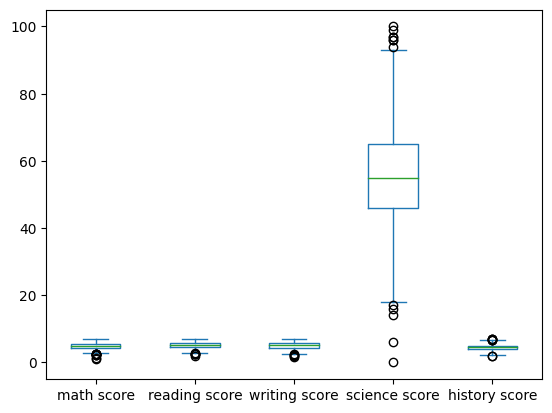

In [ ]:
exploratory_data_analysis(left_grades)

1.- El DataFrame tiene 875 y 12 columnas 

2.- El DataFrame estpa compuesto por las siguientes columnas: ['names' 'gender' 'race/ethnicity' 'parental level of education' 'lunch'
 'test preparation course' 'math score' 'reading score' 'writing score'
 'simple parental level of education' 'science score' 'history score'] 

3.- Ejemplos de filas del DataFrame: 
 
 Las primeras 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
0,Rita Courtney,female,group B,some high school,standard,none,3.22,3.76,3.76,school,25,3.8
1,Charles Linstrom,male,group A,bachelor's degree,standard,completed,5.80,5.68,5.86,college,56,5.2
2,Brian Young,male,group C,some high school,standard,none,5.38,4.96,4.78,school,58,3.8
3,Howard Jimenez,male,group E,some high school,standard,completed,5.86,5.50,5.56,school,72,5.0
4,Wayne Wilson,male,group B,some high school,standard,completed,6.64,6.16,6.22,school,94,4.6



 Las últimas 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
870,Richard Young,male,group D,high school,standard,none,5.14,5.50,5.26,school,62,4.2
871,Wanda Russell,female,group B,high school,free/reduced,completed,2.38,3.64,3.16,school,16,3.6
872,Marina Zeigler,female,group C,bachelor's degree,free/reduced,completed,4.96,5.44,5.86,college,59,4.1
873,Laurie Carter,female,group B,some high school,standard,completed,4.24,4.66,4.72,school,43,4.3
874,Amanda Perez,female,group A,high school,standard,completed,5.08,5.80,5.56,school,61,5.3



 Muestro aleatorio de 5 filas:


,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score
351,Jonathan Rochon,male,group D,associate's degree,standard,completed,5.02,4.24,4.78,college,53,3.9
682,Audrey Head,female,group C,associate's degree,standard,completed,5.02,6.04,6.16,college,60,5.5
773,Mitchell Fisher,male,group B,associate's degree,standard,none,5.80,5.56,4.84,college,64,5.1
632,Jonathan Moser,male,group B,high school,standard,none,4.12,3.88,3.94,school,36,3.9
617,Bernard Gilmore,male,group E,bachelor's degree,standard,completed,5.20,4.84,5.20,college,70,4.8



 4.- Descripción numérica del DataFrame:


,math score,reading score,writing score,science score,history score
count,875.000000,875.000000,875.000000,875.000000,875.000000
mean,4.973509,5.151726,5.086857,55.845714,4.498400
std,0.904603,0.877756,0.910453,14.986118,0.875615
min,1.000000,2.020000,1.600000,0.000000,1.800000
25%,4.420000,4.540000,4.450000,46.000000,3.900000
50%,4.960000,5.200000,5.140000,55.000000,4.500000
75%,5.590000,5.740000,5.740000,65.000000,5.050000
max,7.000000,7.000000,7.000000,100.000000,7.000000



 5.- Cantidad de valores nulos por columna: 

names                                 0
gender                                0
race/ethnicity                        0
parental level of education           0
lunch                                 0
test preparation course               0
math score                            0
reading score                         0
writing score                         0
simple parental level of education    0
science score                         0
history score                         0
dtype: int64

 6.- Cantidad de valores únicos por columna: 

names                                 875
gender                                  2
race/ethnicity                          5
parental level of education             6
lunch                                   2
test preparation course                 2
math score                             79
reading score                          72
writing score                          77
simple parental level of education

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,simple parental level of education,science score,history score



 9.- Boxplot de notas:



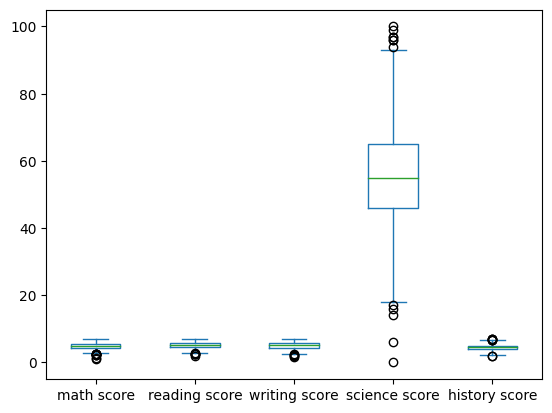

In [ ]:
exploratory_data_analysis(inner_grades)

> **Justificación:**


Tal y como podemos ver, la mejor opción es realizar un join en sentido al dataframe que ya sabemos que se encuentra limpio. Esto debido a que al realizarlo de esta manera se deja afuera lo que está corrupto del dataset. De la misma manera, al hacer un join interno, solo nos quedamos con la intersección de los datos, luego como el dataset de las notas limpio no contiene la filas corruptas, estas de igual manera queda fuera.

## 2.1 Más visualizaciones [0.5 puntos]


<p align="center">
  <img src="https://media4.giphy.com/media/xT5LMWNOjGqJzUfyve/giphy.gif?cid=ecf05e47phkhvg6vadqvcoobvxwj9bzxxk38jjvkcc6eak6t&rid=giphy.gif&ct=g">
</p>




Genere dos visualizaciones extras que encuentre interesantes (y no triviales) con estos datos y explique sus resultados. Agrupe los atributos que estime convenientes.


**To-Do:**
- [ ] Generar dos nuevas visualizaciones con los datos y explicar que están representando.


> **NOTA: No utilice historia ni ciencias, son notas generadas aleatoriamente.**

In [ ]:
grades = pd.melt(df_grades, id_vars=['names'], value_vars=['math score', 'reading score', 'writing score'],
                      var_name ='subject', value_name ='grade', )
grades

,names,subject,grade
0,Rita Courtney,math score,3.22
1,Charles Linstrom,math score,5.80
2,Brian Young,math score,5.38
3,Howard Jimenez,math score,5.86
4,Wayne Wilson,math score,6.64
...,...,...,...
2620,Richard Young,writing score,5.26
2621,Wanda Russell,writing score,3.16
2622,Marina Zeigler,writing score,5.86
2623,Laurie Carter,writing score,4.72


In [ ]:
completed_df = df_grades.query('`test preparation course` == "completed"')
completed_df = completed_df[['math score', 'reading score', 'writing score']]


none_df = df_grades.query('`test preparation course` == "none"')
none_df = none_df[['math score', 'reading score', 'writing score']]

In [ ]:
fig_x1 = go.Figure()

fig_x1.add_trace(go.Histogram(x=completed_df['math score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="test preparation course completed",
                      hovertemplate =
                      '<br><b>subject</b>: math<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))
fig_x1.add_trace(go.Histogram(x=none_df['math score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="none test preparation course",
                      hovertemplate =
                      '<br><b>subject</b>: math<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))

fig_x2 = go.Figure()

fig_x2.add_trace(go.Histogram(x=completed_df['reading score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="test preparation course completed",
                      hovertemplate =
                      '<br><b>subject</b>:reading<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))
fig_x2.add_trace(go.Histogram(x=none_df['reading score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="none test preparation course",
                      hovertemplate =
                      '<br><b>subject</b>:readingh<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))

fig_x3 = go.Figure()

fig_x3.add_trace(go.Histogram(x=completed_df['writing score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="test preparation course completed",
                      hovertemplate =
                      '<br><b>subject</b>: writing<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))
fig_x3.add_trace(go.Histogram(x=none_df['writing score'],
                      xbins=dict(
                      start=0.25,
                      end=7.24,
                      size=0.5), 
                      autobinx=False,
                      name="none test preparation course",
                      hovertemplate =
                      '<br><b>subject</b>: writing<br>'+
                      '<br><b>grade</b>: %{x}<br>'+
                      '<br><b>count</b>: %{y}<br>'
                    ))

fig_x1.show()
fig_x2.show()
fig_x3.show()

In [ ]:
# Group data together
hist_data_math = [completed_df['math score'], none_df['math score']]
hist_data_reading = [completed_df['reading score'], none_df['reading score']]
hist_data_writing = [completed_df['writing score'], none_df['writing score']]

group_labels = ['Completed', 'None']

# Create distplot with custom bin_size
prob_math= ff.create_distplot(hist_data_math, group_labels, show_hist=False, show_rug=False, bin_size=.2)
prob_reading= ff.create_distplot(hist_data_reading, group_labels, show_hist=False, show_rug=False, bin_size=.2)
prob_writing= ff.create_distplot(hist_data_writing, group_labels, show_hist=False, show_rug=False, bin_size=.2)


prob_math.show()
prob_reading.show()
prob_writing.show()

Lios gráficos antesriores se hicieron con la intención de representar la importancia de haber completado el curso de preparación para los distintos test, tal y como se puede apreciar, en matemáticas no posee la misma relevancia que en los cursos de lectura y escritura, en donde la distribución de los alumnos varía bastante, entre los que terminaron este curso y los que no.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana y tienen hasta 3 días de atraso usando sus días comodín. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<p align="center">
  <img src="https://media1.tenor.com/images/2f7df460196625edc45b8380d158e5ee/tenor.gif?itemid=16669403">
</p>

<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>